In [67]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
df = pd.read_excel('C:/Users/anton/OneDrive/Рабочий стол/SPComposite.xlsx', sheet_name = 'Лист1')

In [3]:
# Проверим целостность файла
df

,QUARTER,S&P-INDEX,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1 кв. 1936,14.920000,NaN,QUARTER,Квартал наблюдения
1,2 кв. 1936,14.840000,NaN,S&P-INDEX,Индекс S&P 500 Composite
2,3 кв. 1936,16.010000,NaN,NaN,NaN
3,4 кв. 1936,17.180000,NaN,NaN,NaN
4,1 кв. 1937,17.920000,NaN,NaN,NaN
...,...,...,...,...,...
279,4 кв. 2005,1248.290039,NaN,NaN,NaN
280,1 кв. 2006,1294.829956,NaN,NaN,NaN
281,2 кв. 2006,1270.199951,NaN,NaN,NaN
282,3 кв. 2006,1335.849976,NaN,NaN,NaN


В файле «S&PComposite.xlsx» содержится информация о квартальных значениях индекса S&P 500 Composite. Выделить подходящие подпериоды (например, трехлетние) и оценить для них различные меры риска. Дать подходящую интерпретацию (содержательные объяснения) динамики мер риска.

## **Задача 8.1.**
Оценить для выделенных подпериодов максимальные значения отклонений. С каким видом рискового капитала (Value at risk) его можно отождествить? Проанализировать, как эти величины менялись со временем. Какие объяснения можно дать такой динамике? Проведите сравнение с динамикой дисперсии (задача 7.1).


In [4]:
# Подготовим столбцы с временными периодами для новой таблицы 

timeframeStart = []
a = 1936
while a <= 2005:
    timeframeStart.append(a)
    a += 3
print(timeframeStart)

timeframeFinish = []
b = 1938
while b <= 2006:
    timeframeFinish.append(b)
    b += 3
timeframeFinish.append(2006)
print(timeframeFinish)

t_timeframe = []
t = 1
while t <= 24:
    t_timeframe.append(t)
    t += 1
print(t_timeframe)

[1936, 1939, 1942, 1945, 1948, 1951, 1954, 1957, 1960, 1963, 1966, 1969, 1972, 1975, 1978, 1981, 1984, 1987, 1990, 1993, 1996, 1999, 2002, 2005]
[1938, 1941, 1944, 1947, 1950, 1953, 1956, 1959, 1962, 1965, 1968, 1971, 1974, 1977, 1980, 1983, 1986, 1989, 1992, 1995, 1998, 2001, 2004, 2006]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [5]:
# Создадим таблицу с временными периодами
work_table = pd.DataFrame({'Номер периода': t_timeframe, 'Начало периода': timeframeStart, 'Конец периода': timeframeFinish}) 
work_table

,Номер периода,Начало периода,Конец периода
0,1,1936,1938
1,2,1939,1941
2,3,1942,1944
3,4,1945,1947
4,5,1948,1950
5,6,1951,1953
6,7,1954,1956
7,8,1957,1959
8,9,1960,1962
9,10,1963,1965


In [6]:
#Создаем массив сгруппированных данных  
grouped_data = []
index = np.array(range(12))
i = 1
while i <= 23:
    group = df.loc[index, ['S&P-INDEX']].values
    group = group.reshape(1,12)
    grouped_data.append(group[0])
    index += 12
    i += 1
#group = df.loc[range(276,284), ['S&P-INDEX']].values
#group = group.reshape(1,8)
#grouped_data.append(group[0])

#np.array(grouped_data).shape
grouped_data
np.array(grouped_data).shape

(23, 12)

In [7]:
# находим дисперсии
D = []
for i in grouped_data:
    D.append(np.var(i,ddof = 1))
D.append(4391)

In [8]:
work_table["Дисперсии"] = D
work_table

,Номер периода,Начало периода,Конец периода,Дисперсии
0,1,1936,1938,7.692027
1,2,1939,1941,1.553006
2,3,1942,1944,3.566808
3,4,1945,1947,2.043261
4,5,1948,1950,3.564463
5,6,1951,1953,2.481034
6,7,1954,1956,55.636001
7,8,1957,1959,50.663555
8,9,1960,1962,38.614256
9,10,1963,1965,67.053162


In [9]:
# находим максимальные отклонения от среднего
Max_d = []
for i in grouped_data:
    d_i = []
    AVG_i = np.mean(i)
    for j in i:
        d_j = abs(j-AVG_i)
        d_i.append(d_j)
    max_d = max(d_i)
    Max_d.append(max_d)
Max_d
Max_d.append(90.44)
Max_d

[5.340833426666668,
 2.2266672473333333,
 3.129166522666667,
 2.6233335375000006,
 3.8341663708333336,
 2.991667594166664,
 12.949165823333331,
 10.124999365,
 10.255002655833337,
 13.840834295833332,
 15.20583534250001,
 20.909164426666663,
 34.52499962083334,
 13.547499344999991,
 28.868328727500014,
 31.389999375000002,
 52.93999604166666,
 56.56415939166669,
 73.1916758166667,
 125.47999829166662,
 330.39831587499987,
 266.95837441666663,
 214.41251635833328,
 90.44]

In [10]:
work_table["Максимальное отклонение от среднего"] = Max_d
work_table

,Номер периода,Начало периода,Конец периода,Дисперсии,Максимальное отклонение от среднего
0,1,1936,1938,7.692027,5.340833
1,2,1939,1941,1.553006,2.226667
2,3,1942,1944,3.566808,3.129167
3,4,1945,1947,2.043261,2.623334
4,5,1948,1950,3.564463,3.834166
5,6,1951,1953,2.481034,2.991668
6,7,1954,1956,55.636001,12.949166
7,8,1957,1959,50.663555,10.124999
8,9,1960,1962,38.614256,10.255003
9,10,1963,1965,67.053162,13.840834


In [11]:
# Создаем таблицу с отсортированными максимальными отклонениями от среднего и их квантилями
quantiles = np.array((range(1,25)))
quantiles = quantiles/24
qqq = ['1/24', '2/24','3/24','4/24','5/24','6/24','7/24','8/24','9/24','10/24','11/24','12/24','13/24','14/24','15/24','16/24','17/24','18/24','19/24','20/24','21/24','22/24','23/24','24/24']
table_81 = pd.DataFrame({'Отсортированные максимальные отклонения от среднего': np.sort(Max_d), 'Квантили распределения 1': qqq , 'Квантили распределения 2': quantiles}) 
table_81

,Отсортированные максимальные отклонения от среднего,Квантили распределения 1,Квантили распределения 2
0,2.226667,1/24,0.041667
1,2.623334,2/24,0.083333
2,2.991668,3/24,0.125000
3,3.129167,4/24,0.166667
4,3.834166,5/24,0.208333
5,5.340833,6/24,0.250000
6,10.124999,7/24,0.291667
7,10.255003,8/24,0.333333
8,12.949166,9/24,0.375000
9,13.547499,10/24,0.416667


In [12]:
# Среднее максимальное отклонение
AVG_Max_d = np.mean(Max_d)
AVG_Max_d

59.25611249451388

X(1-a)      = 1 - 1/24 = 1/23 = 0,96
при а = 1/24    

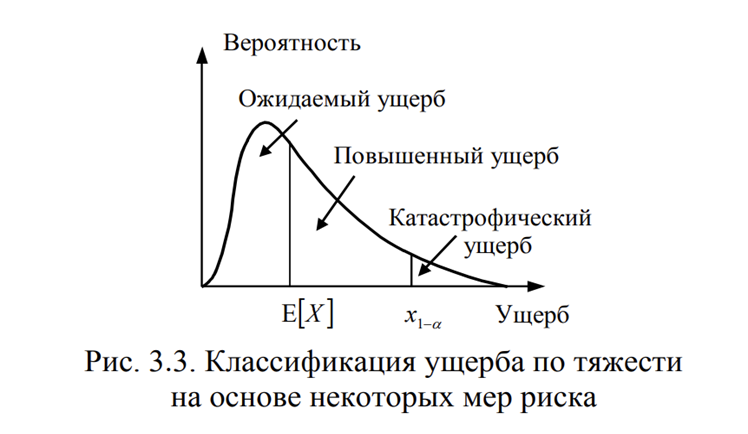

In [13]:
#Выделяем квантили соответствующие ОЖИДАЕМОМУ ущербу
table_811 = table_81.style.apply(lambda x: ['background-color: green' if x.name < 18 else '' for i in x], axis=1)
table_811


,Отсортированные максимальные отклонения от среднего,Квантили распределения 1,Квантили распределения 2
0,2.226667,1/24,0.041667
1,2.623334,2/24,0.083333
2,2.991668,3/24,0.125000
3,3.129167,4/24,0.166667
4,3.834166,5/24,0.208333
5,5.340833,6/24,0.250000
6,10.124999,7/24,0.291667
7,10.255003,8/24,0.333333
8,12.949166,9/24,0.375000
9,13.547499,10/24,0.416667


In [14]:
#Выделяем квантили соответствующие ПОВЫШЕННОМУ ущербу
table_812 = table_81.style.apply(lambda x: ['background-color: yellow' if 17< x.name < 22 else '' for i in x], axis=1)
table_812 

,Отсортированные максимальные отклонения от среднего,Квантили распределения 1,Квантили распределения 2
0,2.226667,1/24,0.041667
1,2.623334,2/24,0.083333
2,2.991668,3/24,0.125000
3,3.129167,4/24,0.166667
4,3.834166,5/24,0.208333
5,5.340833,6/24,0.250000
6,10.124999,7/24,0.291667
7,10.255003,8/24,0.333333
8,12.949166,9/24,0.375000
9,13.547499,10/24,0.416667


In [15]:
#Выделяем квантили соответствующие КАТАСТРОФИЧЕСКОМУ ущербу
table_813 = table_81.style.apply(lambda x: ['background-color: red' if  x.name > 21 else '' for i in x], axis=1)
table_813

,Отсортированные максимальные отклонения от среднего,Квантили распределения 1,Квантили распределения 2
0,2.226667,1/24,0.041667
1,2.623334,2/24,0.083333
2,2.991668,3/24,0.125000
3,3.129167,4/24,0.166667
4,3.834166,5/24,0.208333
5,5.340833,6/24,0.250000
6,10.124999,7/24,0.291667
7,10.255003,8/24,0.333333
8,12.949166,9/24,0.375000
9,13.547499,10/24,0.416667


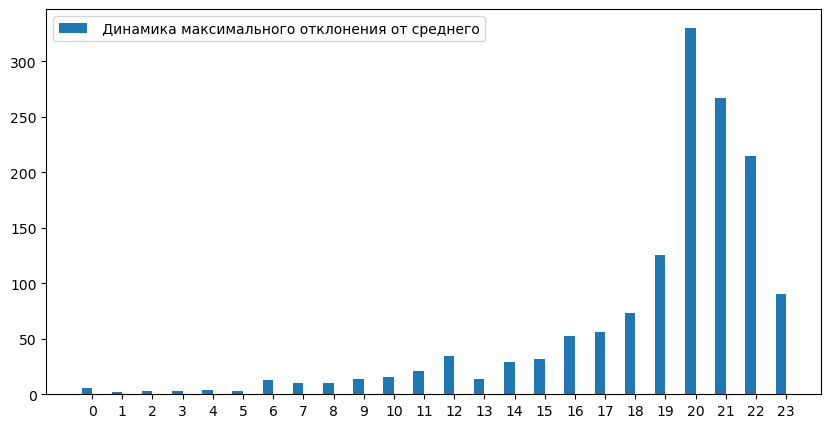

In [19]:
# Построим график динамики максимального отклонения от среднего 
import matplotlib.pyplot as plt

x = np.arange(len(work_table))  
width = 0.35  
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, work_table['Максимальное отклонение от среднего'], width, label=' Динамика максимального отклонения от среднего')


ax.set_ylabel('')
ax.set_xticks(x)
ax.legend()

# Вывод по задаче 8.1


Благодаря анализу максимальных отклонений видно, что период 1999-2001 был самым волатильным (с катастрофическим риском). В 4 периодах был повышенный риск, в то время как в остальных 19 периодах сегодня риск можно классифицировать как ожидаемый, так как максимальное отклонение в них меньше 54,04 (среднего максимального отклонения от среднего).

Временной график у максимального отклонения более гладкий чему у дисперсии, ввиду чего проще отследить динамику риска, однако выбросы и весомые приросты отклоений менее заметны чем у дисперсии. 


## Задача 8.2
Задача 8.2. Оценить для выделенных подпериодов средние абсолютные отклонения от медианы. Дает ли такая мера риска преимущества по сравнению с оценками, полученными в задачах ?.1 и 7.2? Если да, то какие именно

In [20]:
work_table

,Номер периода,Начало периода,Конец периода,Дисперсии,Максимальное отклонение от среднего
0,1,1936,1938,7.692027,5.340833
1,2,1939,1941,1.553006,2.226667
2,3,1942,1944,3.566808,3.129167
3,4,1945,1947,2.043261,2.623334
4,5,1948,1950,3.564463,3.834166
5,6,1951,1953,2.481034,2.991668
6,7,1954,1956,55.636001,12.949166
7,8,1957,1959,50.663555,10.124999
8,9,1960,1962,38.614256,10.255003
9,10,1963,1965,67.053162,13.840834


In [22]:
# находим среднее отклонения от медианы
AVG_Me_d = []
for i in grouped_data:
    d_i = []
    Me_i = np.median(i)
    for j in i:
        d_j = abs(j-Me_i)
        d_i.append(d_j)
    avg_d = np.mean(d_i)
    AVG_Me_d.append(avg_d)
AVG_Me_d
AVG_Me_d.append(44.44)
AVG_Me_d

[2.2041666516666663,
 0.9166666673333334,
 1.4424998750000002,
 0.9650000724999998,
 1.4808335308333334,
 1.1383334808333336,
 6.214166165000002,
 6.226666768333334,
 5.476667085833334,
 6.522500355833333,
 6.555833817500001,
 6.314165748333333,
 12.4166660425,
 6.200832373333334,
 9.046667110833335,
 18.064999891666666,
 29.826666508333332,
 26.702495575,
 32.47333273333333,
 38.70999909166666,
 167.75833137499998,
 117.42333991666665,
 112.44083664166668,
 44.44]

In [23]:
work_table["Среднее отклонение от медианы"] = AVG_Me_d
work_table

,Номер периода,Начало периода,Конец периода,Дисперсии,Максимальное отклонение от среднего,Среднее отклонение от медианы
0,1,1936,1938,7.692027,5.340833,2.204167
1,2,1939,1941,1.553006,2.226667,0.916667
2,3,1942,1944,3.566808,3.129167,1.442500
3,4,1945,1947,2.043261,2.623334,0.965000
4,5,1948,1950,3.564463,3.834166,1.480834
5,6,1951,1953,2.481034,2.991668,1.138333
6,7,1954,1956,55.636001,12.949166,6.214166
7,8,1957,1959,50.663555,10.124999,6.226667
8,9,1960,1962,38.614256,10.255003,5.476667
9,10,1963,1965,67.053162,13.840834,6.522500


In [30]:
# Создаем таблицу с отсортированными средними отклонениями от медианы и их квантилями
quantiles = np.array((range(1,25)))
quantiles = quantiles/24
qqq = ['1/24', '2/24','3/24','4/24','5/24','6/24','7/24','8/24','9/24','10/24','11/24','12/24','13/24','14/24','15/24','16/24','17/24','18/24','19/24','20/24','21/24','22/24','23/24','24/24']
table_82 = pd.DataFrame({'Отсортированные средние отклонения от медианы': np.sort(AVG_Me_d), 'Квантили распределения 1': qqq , 'Квантили распределения 2': quantiles}) 
table_82

,Отсортированные средние отклонения от медианы,Квантили распределения 1,Квантили распределения 2
0,0.916667,1/24,0.041667
1,0.965000,2/24,0.083333
2,1.138333,3/24,0.125000
3,1.442500,4/24,0.166667
4,1.480834,5/24,0.208333
5,2.204167,6/24,0.250000
6,5.476667,7/24,0.291667
7,6.200832,8/24,0.333333
8,6.214166,9/24,0.375000
9,6.226667,10/24,0.416667


In [31]:
# Среднее глобальное отклонение от медианы
Global_AVG_Me_d = np.mean(AVG_Me_d)
Global_AVG_Me_d

27.540069478291667

X(1-a)      = 1 - 1/24 = 1/23 = 0,96
при а = 1/24  

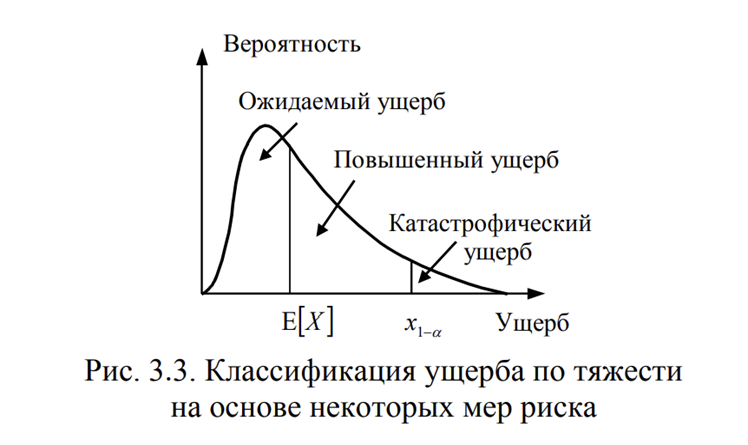

In [32]:
#Выделяем квантили соответствующие ОЖИДАЕМОМУ ущербу
table_822 = table_82.style.apply(lambda x: ['background-color: green' if x.name < 17 else '' for i in x], axis=1)
table_822

,Отсортированные средние отклонения от медианы,Квантили распределения 1,Квантили распределения 2
0,0.916667,1/24,0.041667
1,0.965000,2/24,0.083333
2,1.138333,3/24,0.125000
3,1.442500,4/24,0.166667
4,1.480834,5/24,0.208333
5,2.204167,6/24,0.250000
6,5.476667,7/24,0.291667
7,6.200832,8/24,0.333333
8,6.214166,9/24,0.375000
9,6.226667,10/24,0.416667


In [33]:
#Выделяем квантили соответствующие ПОВЫШЕННОМУ ущербу
table_8222 = table_82.style.apply(lambda x: ['background-color: yellow' if 16< x.name < 22 else '' for i in x], axis=1)
table_8222

,Отсортированные средние отклонения от медианы,Квантили распределения 1,Квантили распределения 2
0,0.916667,1/24,0.041667
1,0.965000,2/24,0.083333
2,1.138333,3/24,0.125000
3,1.442500,4/24,0.166667
4,1.480834,5/24,0.208333
5,2.204167,6/24,0.250000
6,5.476667,7/24,0.291667
7,6.200832,8/24,0.333333
8,6.214166,9/24,0.375000
9,6.226667,10/24,0.416667


In [34]:
#Выделяем квантили соответствующие КАТАСТРОФИЧЕСКОМУ ущербу
table_8222 = table_82.style.apply(lambda x: ['background-color: red' if  x.name > 21 else '' for i in x], axis=1)
table_8222

,Отсортированные средние отклонения от медианы,Квантили распределения 1,Квантили распределения 2
0,0.916667,1/24,0.041667
1,0.965000,2/24,0.083333
2,1.138333,3/24,0.125000
3,1.442500,4/24,0.166667
4,1.480834,5/24,0.208333
5,2.204167,6/24,0.250000
6,5.476667,7/24,0.291667
7,6.200832,8/24,0.333333
8,6.214166,9/24,0.375000
9,6.226667,10/24,0.416667


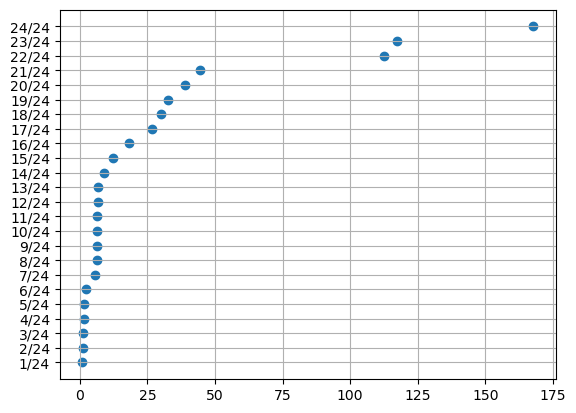

In [58]:
# Функция распределения риска как среднего абсолютного отклонения от медианы
x = table_82['Отсортированные средние отклонения от медианы']
y = table_82['Квантили распределения 1']
plt.grid()
plt.scatter(x, y)

Сгруппируем квантили риска по классификациям ущерба для построения плотности распределения

1 группа  (Ожидаемый ущерб)  - количество 17 - вероятность 17/24

2 группа  (Повышенный ущерб)  - количество 5 - вероятность 5/24

3 группа  (катастрофический ущерб)  - количество 2 - вероятность 2/24


In [39]:
Class = [0,1,2,3,4]
P = [0,17/24,5/24,2/24]

(array([17.,  5.,  2.]),
 array([  0.  ,  27.54, 117.42, 168.  ]),
 <BarContainer object of 3 artists>)

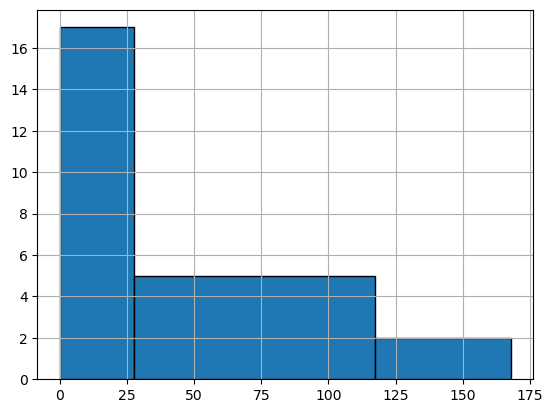

In [56]:
# Построим гистограмму распределения риска 

import matplotlib.pyplot as plt

# список данных
x = np.sort(AVG_Me_d)
plt.grid()

# зададим интервалы исходя из классификаций ущерба
bin_ranges = [0, 27.54, 117.42, 168]

#create histogram with 4 bins
plt.hist (x, bins=bin_ranges, edgecolor='black')

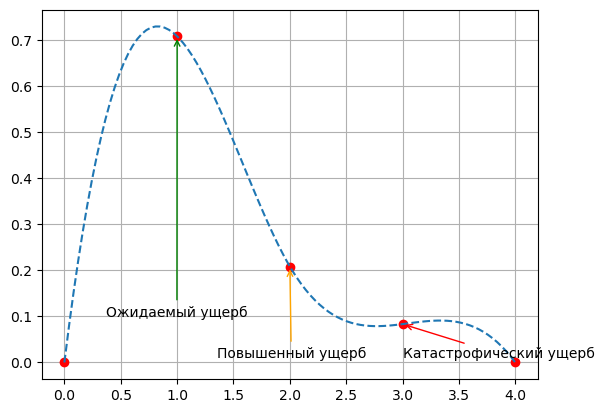

In [110]:
# Построим плотность распределения риска 

Class = [0,1,2,3,4]
P = [0,17/24,5/24,2/24, 0]

# сглаживаем график
import scipy as sp
f2 = sp.interpolate.interp1d(Class, P, kind='cubic')
xnew = np.linspace(0, 4, num=100, endpoint=True)
plt.plot(Class, P, 'ro',xnew, f2(xnew), '--')
plt.grid()
plt.annotate('Ожидаемый ущерб', xy = (1, 17/24), xytext = (0.37, 0.1), arrowprops = dict(arrowstyle ='->', color ='green'))
plt.annotate('Повышенный ущерб', xy = (2, 5/24), xytext = (1.35, 0.01), arrowprops = dict(arrowstyle ='->', color ='orange'))
plt.annotate('Катастрофический ущерб', xy = (3, 2/24), xytext = (3, 0.01), arrowprops = dict(arrowstyle ='->', color ='red'))
plt.show()

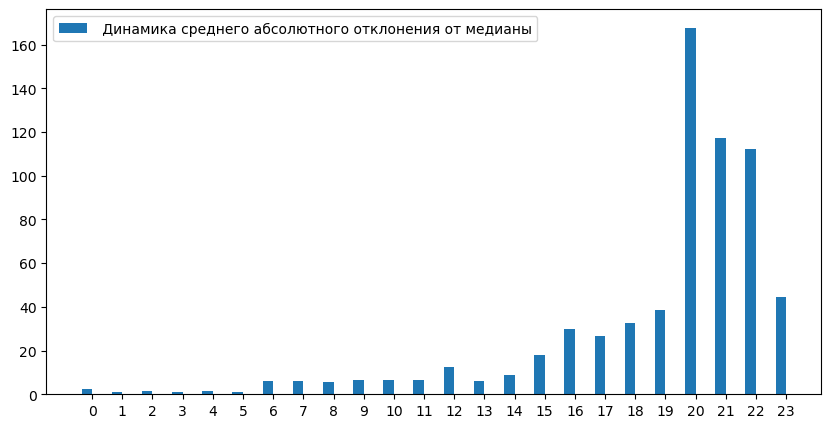

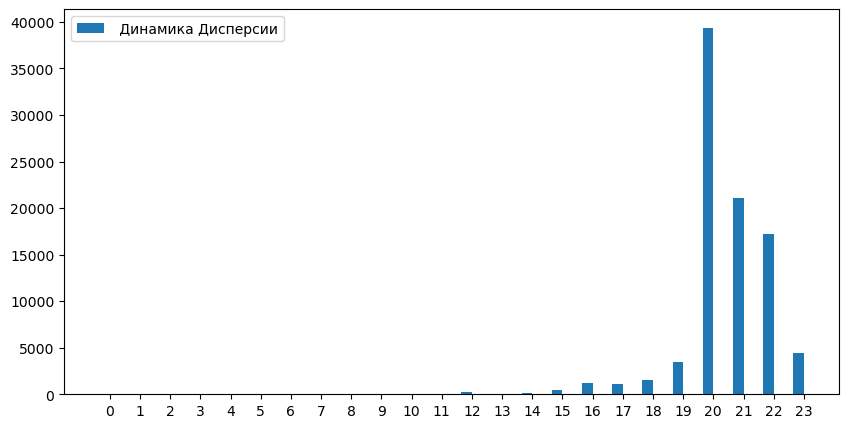

In [109]:
# Построим график динамики среднего абсолютного отклонения от медианы
import matplotlib.pyplot as plt

x = np.arange(len(work_table))  
width = 0.35  
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, work_table['Среднее отклонение от медианы'], width, label=' Динамика среднего абсолютного отклонения от медианы')


ax.set_ylabel('')
ax.set_xticks(x)
ax.legend()
#
x = np.arange(len(work_table))  
width = 0.35  
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, D, width, label=' Динамика Дисперсии')

ax.set_ylabel('')
ax.set_xticks(x)
ax.legend()

## Ответ на задачу 8.2

Среднее абсолютное отклоененние от медианы в качестве меры риска позволяет оценить минимальный возможный ущерб, к которому нужно быть обязательно готовым

(это выводится и свйоства Медианы =>  argmin(y) { E|x-y|} = Me[Xсред]).

Главнымы отличиями среднего абсолютного отклонения от медианы от дисперсии в качестве меры риска являются:
	
    1)Среднее абсолютное отклонение от медианы имеет реальную единицу измерения индекса S&P (в отличие от дисперсии, где эта величина в квадрате)
	
    2)Среднее абсолютное отклонение от медианы дает более гладкий график, благодаря которому удобнее отслеживать тенденцию
   